# Arquitectura LeNet-5 Fashion-MNIST
# Incluye uso de Regularización con Dropout, L2 y L1.


In [0]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection
from keras import regularizers

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_testg,y_testg) = fashion_mnist.load_data()

In [5]:
print(x_train.shape)
print(x_testg.shape)
print(y_train.shape)
print(y_testg.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Partición en Train - Val - Test

In [6]:
idx = np.random.permutation(x_testg.shape[0])
x_testg = x_testg[idx]
y_testg = y_testg[idx]
print(x_testg.shape)
print(y_testg.shape)
print()

(10000, 28, 28)
(10000,)



In [0]:
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_testg, y_testg, train_size=0.80,test_size=0.20)

In [0]:
print(x_val.shape)
print(x_test.shape)
print(y_val.shape)
print(y_test.shape)

(8000, 28, 28)
(2000, 28, 28)
(8000,)
(2000,)


In [0]:
dicc = {0:"T_shirt",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",
          5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle_boot"}

In [0]:
print(dicc)
cc = [0,1,3,5,6,8,21,18,23,28]  # un ejemplo de cada clase/objeto.
fig=plt.figure(figsize=(9,9)) # figure size, inches
k=1
for i in cc:
  fig.add_subplot(2, 5, k)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')
  k += 1

In [0]:
x_train, x_val, x_test = x_train/255.0, x_val/255.0, x_test/255.0

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
ytrain = tf.keras.utils.to_categorical(y_train)
yval = tf.keras.utils.to_categorical(y_val)
ytest = tf.keras.utils.to_categorical(y_test)

In [11]:
ytrain

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
labels = ["T_shirt","Trouser","Pullover","Dress","Coat",
          "Sandal","Shirt","Sneaker","Bag","Ankle_boot"]

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_val = x_val.reshape(x_val.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [0]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(8000, 28, 28, 1)
(2000, 28, 28, 1)


LeNet-5 model:


In [0]:
model = tf.keras.models.Sequential([

   #C1 - feature maps - Convolutional layer:
   #tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
   # L1 & L2:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu',
                          #kernel_regularizer=regularizers.l1(0.01)),
                          #kernel_regularizer=regularizers.l2(0.01)),
                          kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),

   tf.keras.layers.BatchNormalization(axis = -1),
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
   
   # Regularización en Bloques: -- En este caso es mejor no usarlo en los bloques.
   #tf.keras.layers.Dropout(0.25),

   #C3 - Convolutional layer:
   #tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid'),
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid',
                          kernel_regularizer=regularizers.l2(0.01)),
   tf.keras.layers.BatchNormalization(axis = -1,),
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
   
   # Regularización en Bloques:
   #tf.keras.layers.Dropout(0.25),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   #tf.keras.layers.Dense(120, activation='tanh'),
   tf.keras.layers.Dense(120, activation='tanh',
                         kernel_regularizer=regularizers.l2(0.01)),

   #BN:
   tf.keras.layers.BatchNormalization(axis = -1),
   
   # Regularización en Capas de Salida: -- un buen valor es 0.3
   tf.keras.layers.Dropout(0.3),

   #FC-6 - Fully connected layer:
   #tf.keras.layers.Dense(84, activation='tanh'),
   tf.keras.layers.Dense(84, activation='tanh',
                         kernel_regularizer=regularizers.l2(0.01)),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])

In [0]:
n_epochs=5
n_batch=32
learning_rate=0.01

Learning Rate - Exponencial Decay - lr = lr0 * exp( - k * t )

In [0]:
def exp_decay(epoch):
  alfa_0 = 0.001
  factor = 0.001
  dropEvery = 4

  alfa = alfa_0 * np.exp( - factor * np.floor(epoch/dropEvery) )

  return float(alfa)

In [0]:
callbacks_list = [tf.keras.callbacks.LearningRateScheduler(exp_decay)]

In [0]:
opt = tf.keras.optimizers.SGD(lr=learning_rate, decay=learning_rate / n_epochs, momentum=0.9, nesterov=True )

In [0]:
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [20]:
H = model.fit(x_train,ytrain, validation_data=(x_val,yval),
              epochs=n_epochs, batch_size=n_batch)
              #epochs=n_epochs, batch_size=n_batch, callbacks=callbacks_list)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2212 - accuracy: 0.8286 - val_loss: 0.6785 - val_accuracy: 0.8438
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5424 - accuracy: 0.8691 - val_loss: 0.5697 - val_accuracy: 0.8401
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4663 - accuracy: 0.8768 - val_loss: 0.4626 - val_accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4295 - accuracy: 0.8839 - val_loss: 0.4404 - val_accuracy: 0.8769
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4075 - accuracy: 0.8888 - val_loss: 0.4072 - val_accuracy: 0.8913


Una vez entrenado el modelo, ya podemos salvarlo para futuras predicciones:


In [0]:
predictions = model.predict(x_val, batch_size=n_batch)

In [24]:
print(predictions[0])

[3.0464455e-05 7.5767435e-05 7.3683739e-05 2.4359378e-04 1.6618971e-04
 5.2021509e-03 5.6177923e-05 9.9356878e-01 2.4061050e-04 3.4265700e-04]


In [0]:
#score = model.evaluate(x_test, ytest, verbose=0, batch_size=n_batch)
#print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [0]:
model.summary()

In [0]:
#print(model.non_trainable_weights)

In [22]:
print(classification_report(yval.argmax(axis=1),
      predictions.argmax(axis=1),target_names=labels))

              precision    recall  f1-score   support

     T_shirt       0.84      0.86      0.85       816
     Trouser       0.98      0.98      0.98       803
    Pullover       0.83      0.81      0.82       784
       Dress       0.90      0.88      0.89       794
        Coat       0.78      0.87      0.82       784
      Sandal       0.98      0.97      0.97       799
       Shirt       0.73      0.64      0.68       802
     Sneaker       0.92      0.98      0.95       802
         Bag       0.96      0.98      0.97       806
  Ankle_boot       0.98      0.94      0.96       810

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



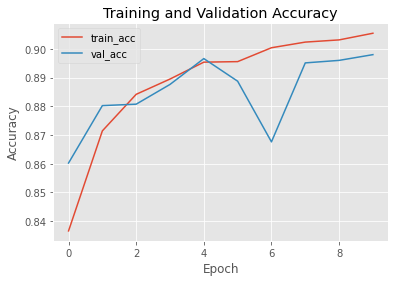

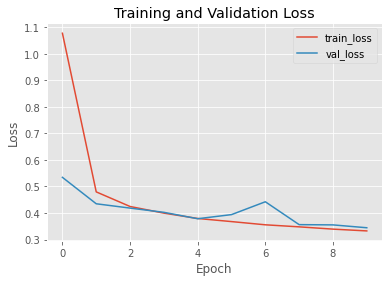

In [0]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [0]:
confusion_matrix(yval.argmax(axis=1), predictions.argmax(axis=1))

array([[672,   0,   8,  12,   4,   2, 100,   0,   3,   0],
       [  1, 790,   0,  15,   3,   0,   2,   0,   2,   0],
       [ 10,   0, 635,   9,  46,   0,  71,   0,   2,   0],
       [ 11,   3,   6, 730,  20,   0,  35,   0,   3,   0],
       [  1,   0,  41,  21, 637,   1,  98,   0,   1,   0],
       [  0,   0,   0,   0,   0, 781,   0,   9,   0,   5],
       [ 84,   2,  41,  17,  38,   0, 632,   0,   6,   0],
       [  0,   0,   0,   0,   0,  11,   0, 791,   0,  23],
       [  0,   2,   4,   2,   1,   3,   3,   5, 752,   0],
       [  0,   0,   0,   0,   0,   4,   0,  25,   0, 764]])

Predicciones en el conjunto de prueba: Test set

In [0]:
predictions_test = model.predict(x_test, batch_size=n_batch)

In [0]:
print(classification_report(ytest.argmax(axis=1),
      predictions_test.argmax(axis=1),target_names=labels))

              precision    recall  f1-score   support

     T_shirt       0.90      0.87      0.88       199
     Trouser       0.99      0.98      0.99       187
    Pullover       0.89      0.84      0.86       227
       Dress       0.91      0.91      0.91       192
        Coat       0.86      0.80      0.83       200
      Sandal       0.98      0.97      0.97       205
       Shirt       0.65      0.78      0.71       180
     Sneaker       0.97      0.97      0.97       175
         Bag       0.99      0.98      0.99       228
  Ankle_boot       0.96      0.97      0.97       207

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [0]:
confusion_matrix(ytest.argmax(axis=1), predictions_test.argmax(axis=1))

array([[173,   0,   2,   2,   1,   0,  21,   0,   0,   0],
       [  0, 184,   0,   2,   0,   0,   1,   0,   0,   0],
       [  1,   0, 190,   4,  12,   0,  19,   0,   1,   0],
       [  2,   1,   2, 175,   4,   0,   8,   0,   0,   0],
       [  1,   0,   7,   7, 160,   0,  25,   0,   0,   0],
       [  0,   0,   0,   0,   0, 198,   0,   1,   0,   6],
       [ 15,   0,  13,   3,   8,   0, 140,   0,   1,   0],
       [  0,   0,   0,   0,   0,   3,   0, 170,   0,   2],
       [  0,   0,   0,   0,   0,   1,   3,   0, 224,   0],
       [  0,   0,   0,   0,   0,   1,   0,   5,   0, 201]])